# 線形な手法とカーネル法（1. 回帰分析）

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(3)

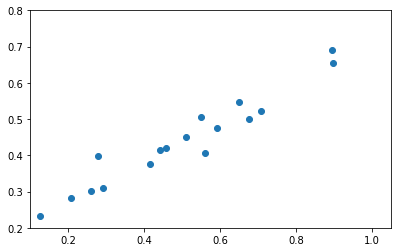

In [3]:
# 線形回帰モデル用データセット
# a : slope of a line
# b : intercept of a line
# size : number of data
# xlim : domain of variable x
# scale : standard deviation
def linear_dataset(a, b, size, xlim=[0, 1], scale=None):
    x = np.random.uniform(xlim[0], xlim[1], size)
    y = a * x + b
    if scale is not None:
        noize = np.random.normal(0, scale, size)
        y = y + noize
    df = pd.DataFrame()
    df['x'] = x
    df['y'] = y
    return df

# データを生成
data = linear_dataset(0.5, 0.2, 20, scale=0.03)

# データを描画
plt.figure(figsize=(6.472, 4))
plt.scatter(data['x'].as_matrix(), data['y'].as_matrix())
plt.xlim((0.1, 1.05))
plt.ylim((0.2, 0.8))
plt.show()

In [4]:
def linear_regression(X, Y):
    X = np.concatenate((np.ones(X.shape[0])[:,np.newaxis], X[:,np.newaxis]), axis=1)
    W = (np.linalg.inv(X.T.dot(X)).dot(X.T)).dot(Y)
    return W

# 重みWを求める
W = linear_regression(data['x'].as_matrix(), data['y'].as_matrix())

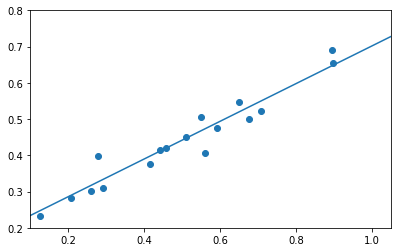

In [5]:
X = np.arange(0, 1.5, 0.01)
Y = W[0] + W[1] * X

plt.figure(figsize=(6.472, 4))
plt.scatter(data['x'].as_matrix(), data['y'].as_matrix())
plt.plot(X, Y)
plt.xlim((0.1, 1.05))
plt.ylim((0.2, 0.8))
plt.show()

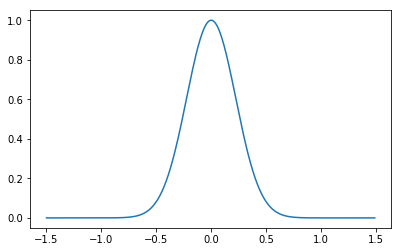

In [6]:
def kernel(xi, xj, beta=1):
    return np.exp(- beta * np.sum((xi - xj)**2))

X = np.arange(-1.5, 1.5, 0.01)
Y = np.zeros(len(X))
for i in range(len(X)):
    Y[i] = kernel(X[i], 0, 10)

plt.figure(figsize=(6.472, 4))
plt.plot(X, Y)
plt.show()

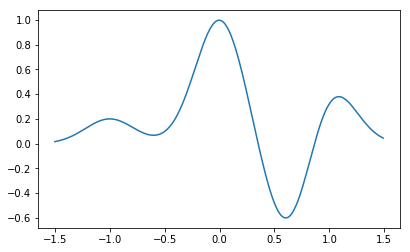

In [7]:
X = np.arange(-1.5, 1.5, 0.01)
Y = np.zeros(len(X))

centers = [-1, 0, 0.5, 0.6, 1]
weights = [0.2, 1, 0.3, -1, 0.5]
for i in range(len(X)):
    for weight, center in zip(weights, centers):
        Y[i] += weight * kernel(X[i], center, 10)

plt.figure(figsize=(6.472, 4))
plt.plot(X, Y)
plt.show()

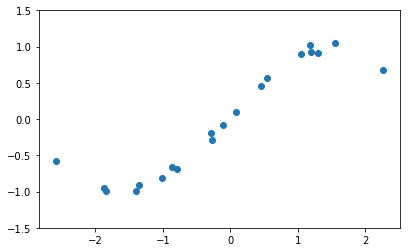

In [8]:
# カーネル回帰モデル用データセット
# size : number of data
# xlim : domain of variable x
# scale : standard deviation
def wave_dataset(size, xlim=[0, 1], scale=None):
    x = np.random.uniform(xlim[0], xlim[1], size)
    y = np.sin(x)
    if scale is not None:
        noize = np.random.normal(0, scale, size)
        y = y + noize
    df = pd.DataFrame()
    df['x'] = x
    df['y'] = y
    return df

# データを生成
data = wave_dataset(20, xlim=[-3.14, 3.14], scale=0.05)

# データを描画
plt.figure(figsize=(6.472, 4))
plt.scatter(data['x'].as_matrix(), data['y'].as_matrix())
plt.ylim((-1.5, 1.5))
plt.show()

In [9]:
from itertools import combinations_with_replacement

X = data['x'].as_matrix()
Y = data['y'].as_matrix()

# ハイパーパラメータ
beta = 1

# データ数
N = X.shape[0]

# グラム行列の計算
K = np.zeros((N, N))
for i, j in combinations_with_replacement(range(N), 2):
    K[i][j] = kernel(X[i], X[j])
    K[j][i] = K[i][j]

In [10]:
# 重みを計算
alpha = np.linalg.inv(K).dot(Y)

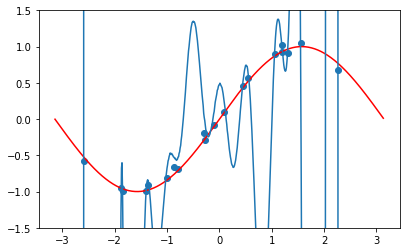

In [11]:
# カーネル回帰
def kernel_predict(X, x, alpha, beta):
    Y = 0
    for i in range(len(X)):
        Y += alpha[i] * kernel(X[i], x, beta)
    return Y

# 回帰によって結果を予測        
X_axis = np.arange(-3.14, 3.14, 0.01)
Y_predict = np.zeros(len(X_axis))
for i in range(len(X_axis)):
    Y_predict[i] = kernel_predict(X, X_axis[i], alpha, beta)

# 結果を描画
plt.figure(figsize=(6.472, 4))

## 観測データ
plt.scatter(data['x'].as_matrix(), data['y'].as_matrix())
## 真の関数
plt.plot(X_axis, np.sin(X_axis), c='red')
## 予測した関数
plt.plot(X_axis, Y_predict)

plt.ylim((-1.5, 1.5))
plt.show()

In [12]:
print(np.mean(np.abs(alpha)))

1.16758690236e+13


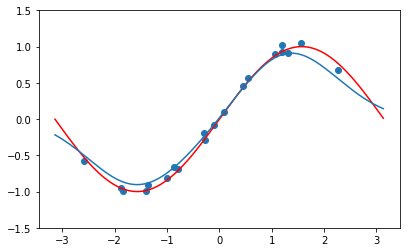

In [13]:
# 正則化項の係数
lam = 0.5
alpha_r = np.linalg.inv(K + lam * np.eye(K.shape[0])).dot(Y)

# 回帰によって結果を予測
Y_predict_r = np.zeros(len(X_axis))
for i in range(len(X_axis)):
    Y_predict_r[i] = kernel_predict(X, X_axis[i], alpha_r, beta)

# 結果を描画
plt.figure(figsize=(6.472, 4))

## 観測データ
plt.scatter(data['x'].as_matrix(), data['y'].as_matrix())
## 真の関数
plt.plot(X_axis, np.sin(X_axis), c='red')
## 予測した関数
plt.plot(X_axis, Y_predict_r)

plt.ylim((-1.5, 1.5))
plt.show()